In [1]:
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 读取 excel 文件，默认返回第一张表 
# 返回类型：<class 'pandas.core.frame.DataFrame'>
def get_data(file):
    sheet = pd.read_excel(io=file)
    return sheet

# 输出模型预测率
def score(svr_model, x, y):
    svr_model.fit(x, y)
    print('预测率：', svr_model.score(x, y))

# 传入  输入 输出 核函数 
# 画图  输出 预测输出
def plot_graph(x, y, svr_model):
    # 样本数——横轴
    sample = [i for i in range(1, len(x)+1)]
    sample = np.reshape(sample, (len(sample), 1))

    # 根据给定的训练数据拟合SVM模型
    svr_model.fit(x, y)

    
    plt.plot(sample, y, color='black', label='Data')  # 实际数据
    plt.plot(sample, svr_model.predict(x), color='red', label='RBF model')  # 预测数据

    plt.xlabel('sample')  # x 轴标签
    plt.ylabel('utilization')  # y 轴标签
    plt.title('Support Vector Regression')  # 图像标题
    plt.legend()  # 显示图例（label）
    plt.show()  # 显示图像

# 测试集 实际输出 和 预测输出
def plot_result(y_test, y_pre_test):
    sample = [i for i in range(1, len(y_test)+1)]
    sample = np.reshape(sample, (len(sample), 1))
    
    plt.plot(sample, y_test, color='black', label='y_test')
    plt.plot(sample, y_pre_test, color='red', label='y_pre_test')

    plt.xlabel('sample')
    plt.ylabel('utilization')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

def plot_three_kernel(x, y):
    sample = [i for i in range(1, len(x)+1)]
    sample = np.reshape(sample, (len(sample), 1))

    # 核函数
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)  # defining the support vector regression models
    svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
    # svr_poly = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')  # 效果太差

    # 拟合输入数据
    svr_rbf.fit(x, y)  # fitting the data points in the models
    svr_lin.fit(x, y)
    # svr_poly.fit(x, y)  # poly 核函数显示不出图像

    # 散点图——实际数据
    plt.scatter(sample, y, color='black', label='Data')

    # 实线图——预测数据
    plt.plot(sample, svr_rbf.predict(x), color='red', label='RBF model')
    plt.plot(sample, svr_lin.predict(x), color='blue', label='Linear model')
    # plt.plot(sample, svr_poly.predict(x), color='yellow', label='Poly model')
    
    plt.xlabel('sample')
    plt.ylabel('utilization')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

In [2]:
file = '/home/solejay/program/bishe/learn/more.xlsx'
data = get_data(file)
# print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# 整体集
x = data.iloc[:, 0:5]
y = data.iloc[:, 5]
# print(type(x))
# print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [4]:
# 训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 0:5], data.iloc[:, 5], test_size=0.25, random_state=33)
# print(type(x_train))
# print(type(y_train))
# print(type(x_test))
# print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
# 核函数
svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
svr_lin = SVR(kernel='linear', C=1e3, gamma='auto')
svr_poly = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')

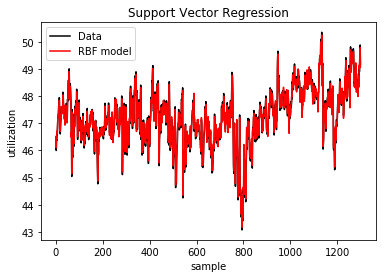

In [6]:
# svr 核函数整体集图像
plot_graph(x, y, svr_rbf)

In [7]:
#　输出整体集、训练集、测试集的预测准确率
score(svr_rbf, x, y)
score(svr_rbf, x_train, y_train)
score(svr_rbf, x_test, y_test)
print("==============================")
score(svr_lin, x, y)
score(svr_lin, x_train, y_train)
score(svr_lin, x_test, y_test)
print("==============================")
score(svr_poly, x, y)
score(svr_poly, x_train, y_train)
score(svr_poly, x_test, y_test)
print("==============================")

预测率： 0.9907077193383291
预测率： 0.9907298732948435
预测率： 0.9912123510332203
预测率： -24949.96883110657
预测率： -35488.70974441432
预测率： -16483.15848772853
预测率： -368910586233540.25
预测率： -152805520105467.3
预测率： -160833601254882.38


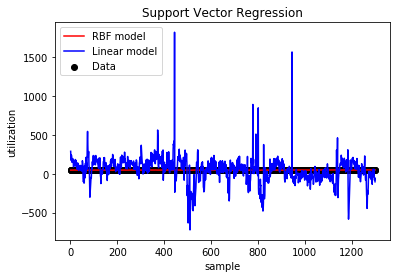

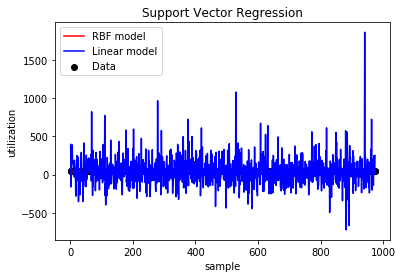

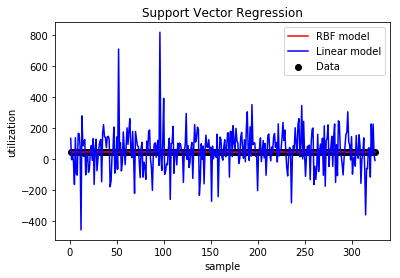

In [8]:
# 两个核函数整体集、训练集、测试集图像
plot_three_kernel(x, y)
plot_three_kernel(x_train, y_train)
plot_three_kernel(x_test, y_test)

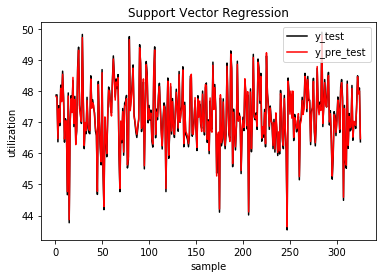

In [9]:
# 测试集预测结果图
svr_rbf.fit(x_test, y_test)
y_pre_test = svr_rbf.predict(x_test)
plot_result(y_test, y_pre_test)